Decompressing WhiteboxTools_win_amd64.zip ...
WhiteboxTools package directory: C:\Users\mason\anaconda3\envs\rasterio\lib\site-packages\whitebox


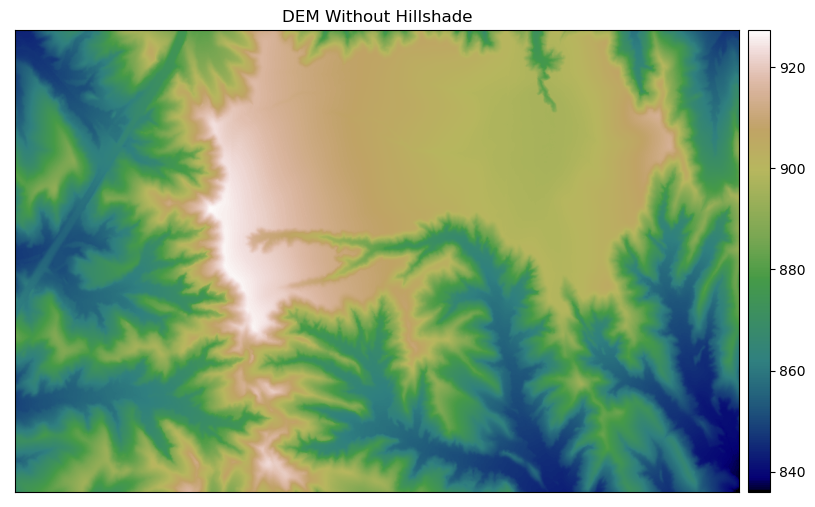

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from rasterio.plot import show
from whitebox import WhiteboxTools
wbt = WhiteboxTools()
#os.chdir("C:/Users/mason/Dropbox/aeolian_landscapes/GIS_working/")
dem1 = "table.tif"

# Open the DEM with Rasterio
with rio.open(dem1) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DEM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

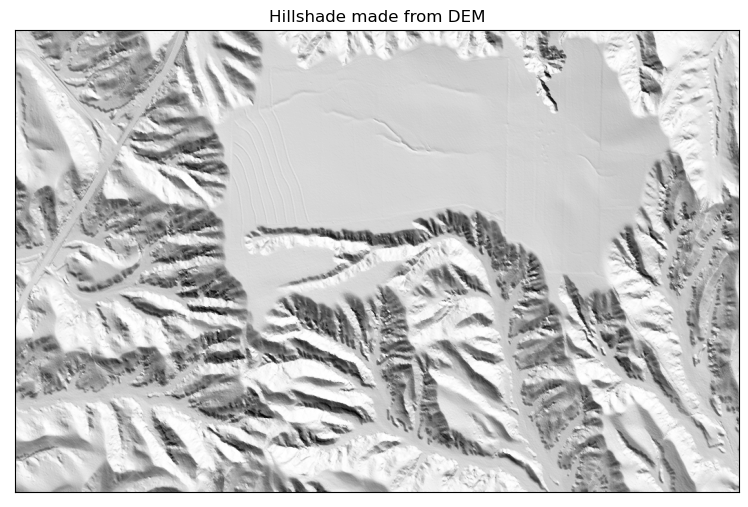

In [2]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DEM",
    figsize=(10, 6),
)
plt.show()

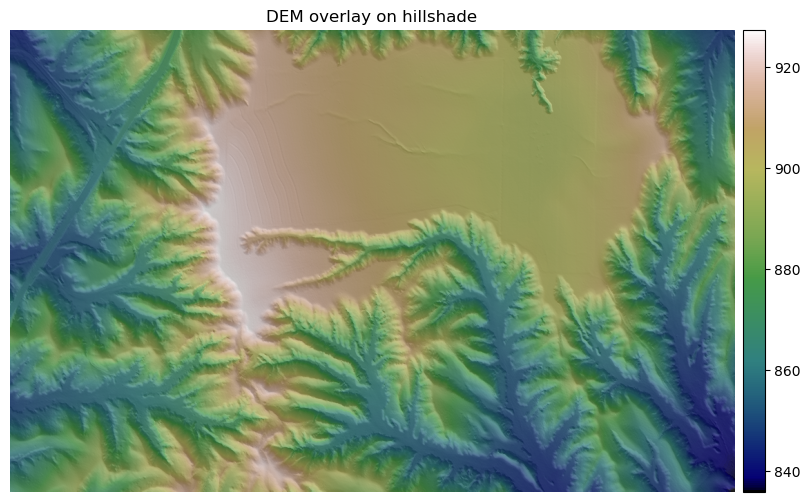

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(elevation, 
              ax=ax, 
              cmap='gist_earth',
              title="DEM overlay on hillshade")

ep.plot_bands(hillshade, 
              cmap='Greys', 
              alpha=0.3, 
              ax=ax, 
              cbar=False)

ax.set_axis_off()

plt.show()


In [5]:
wbt.set_working_dir(os.path.dirname("/data"))
wbt.multidirectional_hillshade(
    dem="table.tif", 
    output="md_hs.tif",
    altitude=30.0, 
    zfactor=2.0, 
    full_mode=False
    )

.\whitebox_tools.exe --run="MultidirectionalHillshade" --wd="c:\Users\Mason\Dropbox\aeolian_landscapes\GIS_working" --dem='table.tif' --output='md_hs.tif' --altitude=30.0 --zfactor='2.0' -v --compress_rasters=False

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22

0

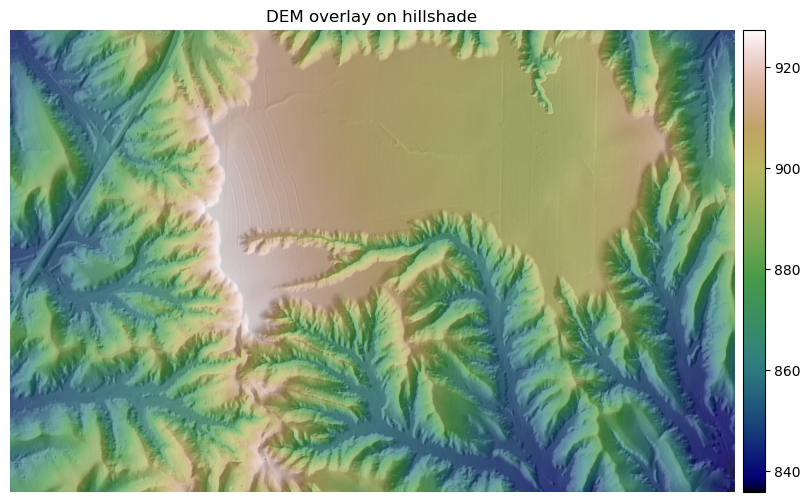

In [6]:
md_hs = rio.open("md_hs.tif")
md_hs2 = md_hs.read()

fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(elevation, 
              ax=ax, 
              cmap='gist_earth',
              title="DEM overlay on hillshade")

ep.plot_bands(md_hs2, 
              cmap='Greys', 
              alpha=0.3, 
              ax=ax, 
              cbar=False)

ax.set_axis_off()

plt.show()

In [7]:
wbt.slope(
    dem="table.tif", 
    output="table_slp.tif",  
    zfactor=None,
    units="degrees"
)

.\whitebox_tools.exe --run="Slope" --wd="c:\Users\Mason\Dropbox\aeolian_landscapes\GIS_working" --dem='table.tif' --output='table_slp.tif' --units=degrees -v --compress_rasters=False

****************************
* Welcome to Slope         *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress:

0

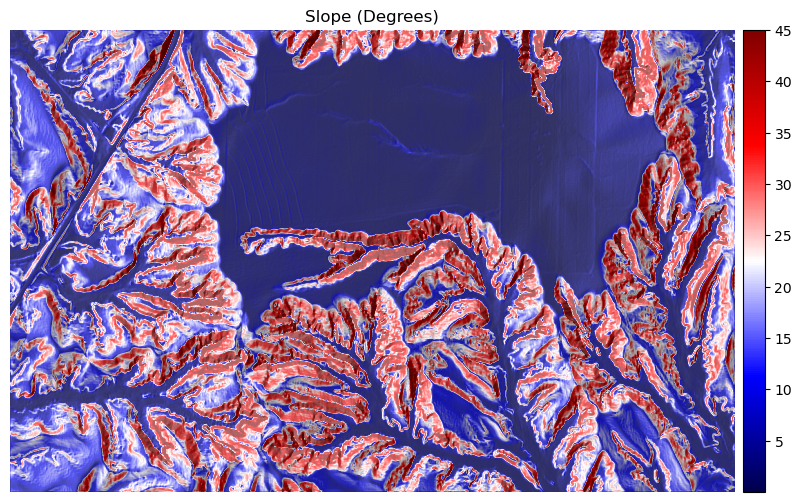

In [8]:
slp = rio.open("table_slp.tif")
slp2 = slp.read()
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(slp2, 
    ax=ax, 
    cmap='seismic',
    title="Slope (Degrees)",
    vmax=45.0)

ep.plot_bands(md_hs2, 
    cmap='Greys', 
    alpha=0.4, 
    ax=ax, 
    cbar=False)

ax.set_axis_off()

plt.show()

In [9]:
wbt.breach_depressions(
    dem="table.tif", 
    output="table_fill.tif", 
    max_depth=None, 
    max_length=None, 
    flat_increment=None, 
    fill_pits=True,
)

wbt.d_inf_flow_accumulation(
    i="table_fill.tif", 
    output="table_acc.tif", 
    out_type="specific contributing area",  
    threshold=1000, 
    log=False, 
    clip=False, 
    pntr=False, 
)

wbt.extract_streams(
    flow_accum="table_acc.tif", 
    output="table_strm.tif", 
    threshold=1000.0, 
    zero_background=False, 
)

.\whitebox_tools.exe --run="BreachDepressions" --wd="c:\Users\Mason\Dropbox\aeolian_landscapes\GIS_working" --dem='table.tif' --output='table_fill.tif' --fill_pits -v --compress_rasters=False

********************************
* Welcome to BreachDepressions *
* Powered by WhiteboxTools     *
* www.whiteboxgeo.com          *
********************************
Reading data...
Filling pits: 0%
Filling pits: 1%
Filling pits: 2%
Filling pits: 3%
Filling pits: 4%
Filling pits: 5%
Filling pits: 6%
Filling pits: 7%
Filling pits: 8%
Filling pits: 9%
Filling pits: 10%
Filling pits: 11%
Filling pits: 12%
Filling pits: 13%
Filling pits: 14%
Filling pits: 15%
Filling pits: 16%
Filling pits: 17%
Filling pits: 18%
Filling pits: 19%
Filling pits: 20%
Filling pits: 21%
Filling pits: 22%
Filling pits: 23%
Filling pits: 24%
Filling pits: 25%
Filling pits: 26%
Filling pits: 27%
Filling pits: 28%
Filling pits: 29%
Filling pits: 30%
Filling pits: 31%
Filling pits: 32%
Filling pits: 33%
Filling pits: 34%
Fillin

Num. inflowing neighbours: 65%
Num. inflowing neighbours: 66%
Num. inflowing neighbours: 67%
Num. inflowing neighbours: 68%
Num. inflowing neighbours: 69%
Num. inflowing neighbours: 70%
Num. inflowing neighbours: 71%
Num. inflowing neighbours: 72%
Num. inflowing neighbours: 73%
Num. inflowing neighbours: 74%
Num. inflowing neighbours: 75%
Num. inflowing neighbours: 76%
Num. inflowing neighbours: 77%
Num. inflowing neighbours: 78%
Num. inflowing neighbours: 79%
Num. inflowing neighbours: 80%
Num. inflowing neighbours: 81%
Num. inflowing neighbours: 82%
Num. inflowing neighbours: 83%
Num. inflowing neighbours: 84%
Num. inflowing neighbours: 85%
Num. inflowing neighbours: 86%
Num. inflowing neighbours: 87%
Num. inflowing neighbours: 88%
Num. inflowing neighbours: 89%
Num. inflowing neighbours: 90%
Num. inflowing neighbours: 91%
Num. inflowing neighbours: 92%
Num. inflowing neighbours: 93%
Num. inflowing neighbours: 94%
Num. inflowing neighbours: 95%
Num. inflowing neighbours: 96%
Num. inf

0

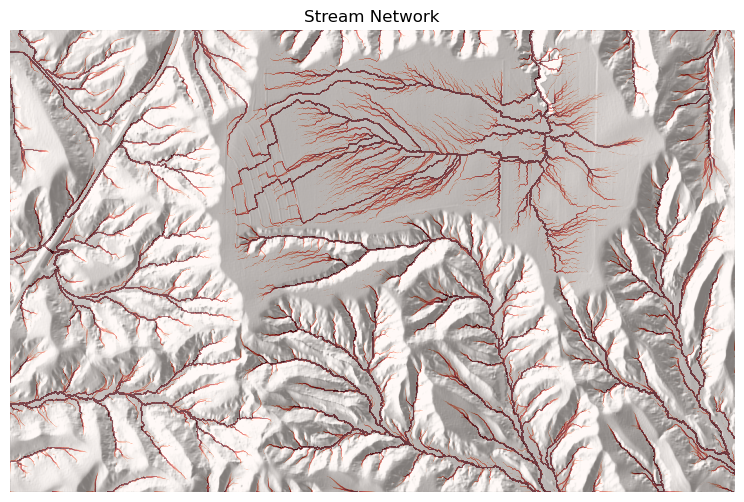

In [10]:
acc = rio.open("table_acc.tif")
acc2 = acc.read()
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(acc2, 
    ax=ax, 
    norm=colors.LogNorm(vmin=100.0, vmax=1000),
    cmap='Reds',
    title="Stream Network",
    cbar=False)

ep.plot_bands(md_hs2, 
    cmap='Greys', 
    alpha=0.5, 
    ax=ax, 
    cbar=False)

ax.set_axis_off()

plt.show()